In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import random


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.datasets import make_classification
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [3]:
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import model_selection

# LIVER SEQUENCE ONLY MODEL

In [4]:
Pos_Seq= pd.read_csv('Positive_Liver_One_hot.csv', header = None)
Pos_Seq['Label'] = 'bound'


Neg_Seq = pd.read_csv('Negative_Liver_One_hot.csv', header = None)
Neg_Seq['Label'] = 'unbound'


#Neg_Seq_Sample = resample(Neg_Seq, n_samples=3725, replace=False, stratify=Neg_Seq)

Seq_Data = pd.concat([Pos_Seq,Neg_Seq],ignore_index=True)
Seq_Data = Seq_Data.reindex(np.random.permutation(Seq_Data.index))

Seq_Data['label']=pd.get_dummies(Seq_Data.Label, prefix='Label').iloc[:,:-1]
Seq_Data = Seq_Data.drop(['Label'], axis =1)


Seq_X = Seq_Data.drop('label', axis=1)
Seq_Y = Seq_Data['label']



# SEQUENCE ONLY LOGISTIC REGRESSION

In [5]:
X_train,X_test,y_train,y_test = train_test_split(Seq_X,Seq_Y,test_size=0.3, random_state=40210894)


In [6]:
Seq_log = LogisticRegression( max_iter=10000000, class_weight= {0:1,1:51},random_state= 40210894)
Seq_log.fit(X_train,y_train)
print(Seq_log.score(X_train,y_train))

0.6524528134561095


In [7]:
Seq_log_pred=Seq_log.predict_proba(X_test)[:,1]

Text(0.5, 257.44, 'Predicted label')

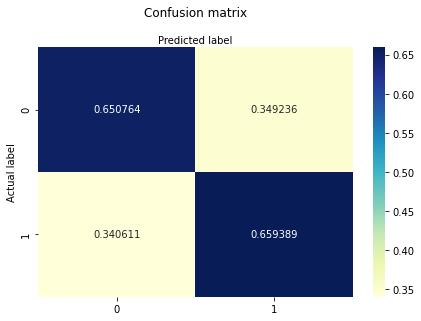

In [8]:
CM=metrics.confusion_matrix(y_test,  Seq_log_pred.round(), normalize='true')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig('LIVER_SEQ_ONLY_LOG_Confusion_Matrix.png')

In [9]:
print(classification_report(y_test,Seq_log_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     56847
           1       0.04      0.66      0.07      1145

    accuracy                           0.65     57992
   macro avg       0.51      0.66      0.43     57992
weighted avg       0.97      0.65      0.77     57992



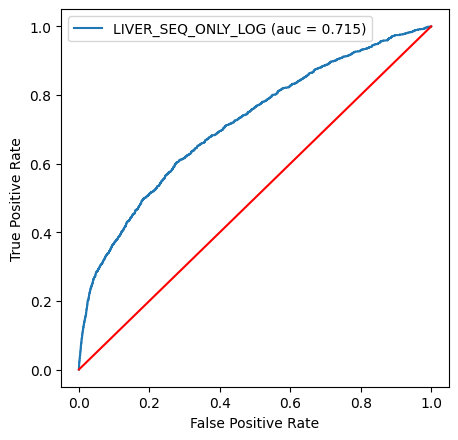

In [10]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,Seq_log_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, label='LIVER_SEQ_ONLY_LOG (auc = %0.3f)' % auc_logistic)
plt.plot([0,1], [0,1], c='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.savefig('LIVER_SEQ_ONLY_LOG_AUC.png')

plt.show()

In [11]:
liver_seq_average_precision = average_precision_score(y_test,  Seq_log_pred)

print('Average precision-recliver_seq_shape score: {0:0.2f}'.format(
      liver_seq_average_precision))

Average precision-recliver_seq_shape score: 0.08


Text(0.5, 1.0, ' Precision-Recall curve: AP=0.08')

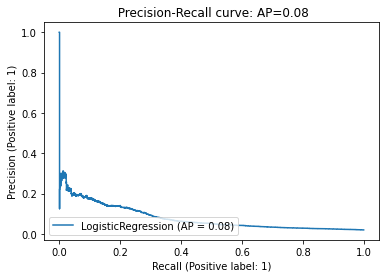

In [12]:
liver_Seq = plot_precision_recall_curve( Seq_log, X_test, y_test)
liver_Seq.ax_.set_title(' Precision-Recall curve: '
                   'AP={0:0.2f}'.format(liver_seq_average_precision))
#plt.savefig('LIVER_SEQ_SHAPE_XGB_PR_CURVE.png')

# LIVER SEQUENCE + SHAPE

In [13]:
Liver_SEQ_SHAPE_Pos= pd.read_csv('Pos_DNA_Five_Shape.csv')
Liver_SEQ_SHAPE_Pos['Label'] = 'bound'

Liver_SEQ_SHAPE_Neg= pd.read_csv('All_Neg_DNA_Five_Shape.csv')
Liver_SEQ_SHAPE_Neg['Label'] = 'unbound'


Liver_SEQ_SHAPE_Data= pd.concat([Liver_SEQ_SHAPE_Pos,Liver_SEQ_SHAPE_Neg], ignore_index=True)
Liver_SEQ_SHAPE_Data= Liver_SEQ_SHAPE_Data.reindex(np.random.permutation(Liver_SEQ_SHAPE_Data.index))


Liver_SEQ_SHAPE_Data['label']=pd.get_dummies(Liver_SEQ_SHAPE_Data.Label, prefix='Label').iloc[:,:-1]
Liver_SEQ_SHAPE_Data = Liver_SEQ_SHAPE_Data.drop(['Label'], axis =1)


Liver_SEQ_SHAPE_X= Liver_SEQ_SHAPE_Data.drop('label', axis=1)
Liver_SEQ_SHAPE_Y= Liver_SEQ_SHAPE_Data['label']

# LOGISTIC REGRESSION MODEL FOR LIVER SEQ + SHAPE

In [14]:
X_train,X_test,y_train,y_test = train_test_split(Liver_SEQ_SHAPE_X,Liver_SEQ_SHAPE_Y,test_size=0.3,random_state=40210894)

In [15]:
Liver_SEQ_SHAPE_log = LogisticRegression( max_iter=1000000, class_weight= {0:1,1:51},random_state= 40210894)
Liver_SEQ_SHAPE_log.fit(X_train,y_train)
print(Liver_SEQ_SHAPE_log.score(X_train,y_train))

0.8991456907637052


In [16]:
Liver_SEQ_SHAPE_pred = Liver_SEQ_SHAPE_log.predict_proba(X_test)[:,1]

Text(0.5, 257.44, 'Predicted label')

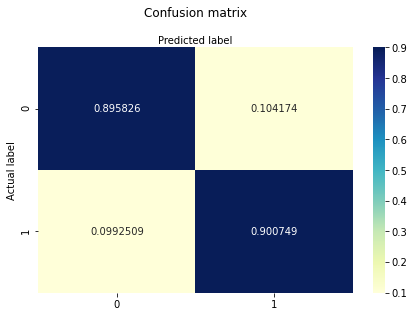

In [17]:
CM=metrics.confusion_matrix(y_test,  Liver_SEQ_SHAPE_pred.round(), normalize='true')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig('LIVER_SEQ_SHAPE_LOG_Confusion_Matrix.png')

In [18]:
print(classification_report(y_test, Liver_SEQ_SHAPE_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     56924
           1       0.14      0.90      0.24      1068

    accuracy                           0.90     57992
   macro avg       0.57      0.90      0.59     57992
weighted avg       0.98      0.90      0.93     57992



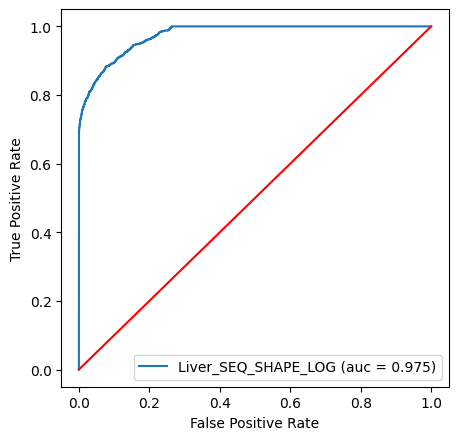

In [19]:
Liver_SEQ_SHAPE_log_fpr,Liver_SEQ_SHAPE_log_tpr, threshold = roc_curve(y_test, Liver_SEQ_SHAPE_pred)
Liver_SEQ_SHAPE_log_auc_logistic = auc(Liver_SEQ_SHAPE_log_fpr, Liver_SEQ_SHAPE_log_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(Liver_SEQ_SHAPE_log_fpr, Liver_SEQ_SHAPE_log_tpr, label='Liver_SEQ_SHAPE_LOG (auc = %0.3f)' % Liver_SEQ_SHAPE_log_auc_logistic)
plt.plot([0,1], [0,1], c='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#plt.savefig('Liver_SEQ_SHAPE_LOG_AUC_CURVE.png')

plt.show()

In [20]:
Liver_SEQ_SHAPE_log_average_precision = average_precision_score(y_test,  Liver_SEQ_SHAPE_pred)

print('Average precision-recLiver_SEQ_SHAPE score: {0:0.2f}'.format(
      Liver_SEQ_SHAPE_log_average_precision))

Average precision-recLiver_SEQ_SHAPE score: 0.79


Text(0.5, 1.0, ' Precision-RecLiver_SEQ_SHAPE curve: AP=0.79')

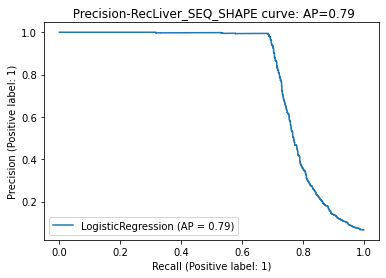

In [21]:
Liver_SEQ_SHAPE_log_Seq = plot_precision_recall_curve( Liver_SEQ_SHAPE_log, X_test, y_test)
Liver_SEQ_SHAPE_log_Seq.ax_.set_title(' Precision-RecLiver_SEQ_SHAPE curve: '
                   'AP={0:0.2f}'.format(Liver_SEQ_SHAPE_log_average_precision))
#plt.savefig('Liver_SEQ_SHAPE_LOG_PR_CURVE.png')

# MODELS LIVER FOR SEQ_SHAPE_HISTONE MARKS

In [22]:


Positive_Liver_SSH = pd.read_csv('POSITIVE_LIVER_SEQSHAHIS_DATA.csv')
Positive_Liver_SSH['Label'] = 'bound'



Negative_Liver_SSH = pd.read_csv('NEGATIVE_LIVER_SEQSHAHIS_DATA.csv')
Negative_Liver_SSH = pd.DataFrame(Negative_Liver_SSH).fillna(0)
Negative_Liver_SSH.isnull().values.any()
Negative_Liver_SSH['Label'] = 'unbound'




LIVER_SSH_Data = pd.concat([Positive_Liver_SSH,Negative_Liver_SSH], ignore_index=True)
LIVER_SSH_Data = LIVER_SSH_Data.reindex(np.random.permutation(LIVER_SSH_Data.index))
LIVER_SSH_Data

LIVER_SSH_Data['label']=pd.get_dummies(LIVER_SSH_Data.Label, prefix='Label').iloc[:,:-1]
LIVER_SSH_Data = LIVER_SSH_Data.drop(['Label'], axis =1)
LIVER_SSH_Data

LIVER_SSH_Data_X = LIVER_SSH_Data.drop('label', axis=1)
LIVER_SSH_Data_Y = LIVER_SSH_Data['label']

#  LOGISTIC REGRESSION FOR  LIVER SEQ_SHAPE_HISTONE MARKS

In [23]:
X_train,X_test,y_train,y_test = train_test_split(LIVER_SSH_Data_X, LIVER_SSH_Data_Y, test_size=0.3, random_state= 40210894)

In [24]:
Seq_Shape_Histone_log = LogisticRegression( max_iter=10000000, class_weight= {0:1,1:51},random_state= 40210894)
Seq_Shape_Histone_log.fit(X_train,y_train)
print(Seq_Shape_Histone_log.score(X_train,y_train))

0.9020204581959591


In [25]:
Seq_Shape_Histone_log_pred = Seq_Shape_Histone_log.predict_proba(X_test)[:,1]

Text(0.5, 257.44, 'Predicted label')

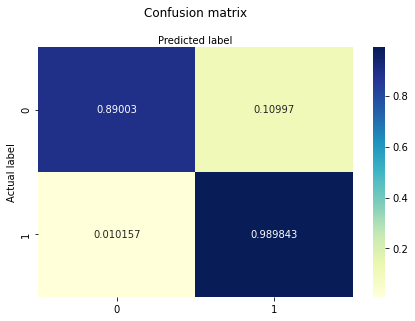

In [26]:
CM=metrics.confusion_matrix(y_test,  Seq_Shape_Histone_log_pred.round(), normalize='true')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig('LIVER_SSH_LOG_Confusion_Matrix.png')

In [27]:
print(classification_report(y_test, Seq_Shape_Histone_log_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      9057
           1       0.52      0.99      0.68      1083

    accuracy                           0.90     10140
   macro avg       0.76      0.94      0.81     10140
weighted avg       0.95      0.90      0.91     10140



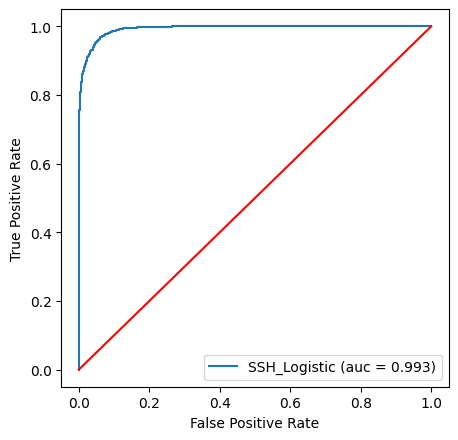

In [28]:
SSH_log_fpr,SSH_log_tpr, threshold = roc_curve(y_test, Seq_Shape_Histone_log_pred)
SSH_log_auc_logistic = auc(SSH_log_fpr, SSH_log_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(SSH_log_fpr, SSH_log_tpr, label='SSH_Logistic (auc = %0.3f)' % SSH_log_auc_logistic)
plt.plot([0,1], [0,1], c='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#plt.savefig('LIVER_SSH_LOG_AUC_CURVE.png')

plt.show()

In [29]:
SSH_log_average_precision = average_precision_score(y_test,  Seq_Shape_Histone_log_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      SSH_log_average_precision))

Average precision-recall score: 0.96


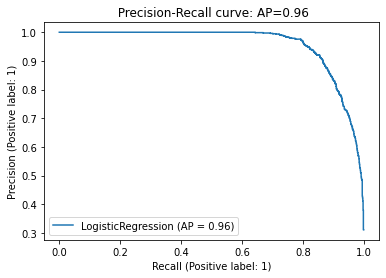

In [30]:
SSH_log_Seq = plot_precision_recall_curve( Seq_Shape_Histone_log, X_test, y_test)
SSH_log_Seq.ax_.set_title(' Precision-Recall curve: '
                   'AP={0:0.2f}'.format(SSH_log_average_precision))
#plt.savefig('LIVER_SSH_LOG_PR_CURVE.png')
plt.show()

# LIVER CROSS VALIDATION FOR ALL MODEL

In [31]:
def make_model(X, y, params):
    from xgboost import XGBClassifier
    
    model = LogisticRegression(
        **params
    )
    model.fit(X, y)

    
    return model

In [32]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve, roc_curve, precision_recall_curve
from sklearn.model_selection import StratifiedKFold

def plot_roc(LIVER_SSH_Data, ax, ax2,  params, color, features):
    cv = StratifiedKFold(n_splits=5)

    tprs = []
    recalls = []
    aucs = []
    auc_prcs = []
    mean_fpr = np.linspace(0, 1, 100)
    mean_recalls = np.linspace(0,1,10001)
    X, y = LIVER_SSH_Data.drop('label', axis=1).values, LIVER_SSH_Data['label'].values

    for i, (train, test) in enumerate(cv.split(X, y)):
        print('----', i)
        m = make_model(X[train], y[train], params)
        #viz = plot_roc_curve(m, X[test], y[test],
        #                     name='ROC fold {}'.format(i),
        #                     alpha=0.3, lw=1, ax=ax)
        y_pred = m.predict_proba(X[test])[:,1]
        viz = roc_curve(y[test], y_pred)
        viz2 = precision_recall_curve(y[test], y_pred)
        interp_tpr = np.interp(mean_fpr, viz[0], viz[1])
        interp_tpr[0] = 0.0
        
        #import pdb; pdb.set_trace()
        interp_recall = np.interp(mean_recalls, viz2[0], viz2[1])
        interp_recall[0] = 1.0
        
        recalls.append(interp_recall)
        tprs.append(interp_tpr)
        auc_prcs.append(auc(viz2[1], viz2[0]))
        aucs.append(auc(viz[0], viz[1]))
        print('AUROCS: ', aucs)
        print('AUPRCS: ', auc_prcs)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            alpha=.8)

    mean_recall = np.mean(recalls, axis=0)
    mean_recall[-1] = 0.0
    mean_auprc = auc(mean_recalls, mean_recall)
    std_auprc = np.std(auc_prcs)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color=color,
            label=r'%s (AUROC = %0.2f $\pm$ %0.2f)' % (features, mean_auc, std_auc),
            lw=2, alpha=.8)

    ax2.plot(mean_recalls, mean_recall, color=color,
        label=r'%s (AUPRC = %0.2f $\pm$ %0.2f)' % (features, mean_auprc, std_auprc),
        lw=2, alpha=.8)

    
    std_tpr = 1.96*np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color=color, alpha=.2)
                    #label=r'$\pm$ 1 std. dev.')

    std_recall = 1.96*np.std(recalls, axis=0)
    recalls_upper = np.minimum(mean_recall + std_recall, 1)
    recalls_lower = np.maximum(mean_recall - std_recall, 0)
    ax2.fill_between(mean_recalls, recalls_lower, recalls_upper, color=color, alpha=.2)
                    #label=r'$\pm$ 1 std. dev.')

        
    #ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    #       title="Receiver operating characteristic example")
    #ax.legend(loc="lower right")
    #plt.show()

sequence
---- 0
AUROCS:  [0.7137574776981088]
AUPRCS:  [0.07626968609889838]
---- 1
AUROCS:  [0.7137574776981088, 0.7011987997487912]
AUPRCS:  [0.07626968609889838, 0.07204972334460347]
---- 2
AUROCS:  [0.7137574776981088, 0.7011987997487912, 0.7061952029601287]
AUPRCS:  [0.07626968609889838, 0.07204972334460347, 0.09117966643972017]
---- 3
AUROCS:  [0.7137574776981088, 0.7011987997487912, 0.7061952029601287, 0.7204976773099985]
AUPRCS:  [0.07626968609889838, 0.07204972334460347, 0.09117966643972017, 0.08549958803267088]
---- 4
AUROCS:  [0.7137574776981088, 0.7011987997487912, 0.7061952029601287, 0.7204976773099985, 0.69675046429019]
AUPRCS:  [0.07626968609889838, 0.07204972334460347, 0.09117966643972017, 0.08549958803267088, 0.07277772685368333]
sequence+shape
---- 0
AUROCS:  [0.9749544793440564]
AUPRCS:  [0.7889697841922065]
---- 1
AUROCS:  [0.9749544793440564, 0.97430558259834]
AUPRCS:  [0.7889697841922065, 0.7913319270238669]
---- 2
AUROCS:  [0.9749544793440564, 0.97430558259834, 0

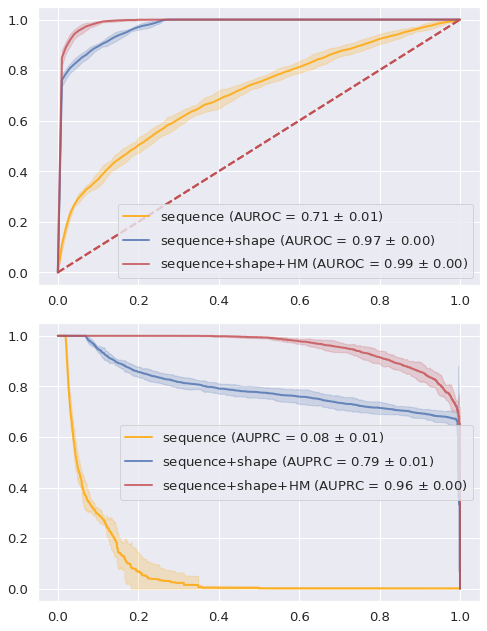

In [33]:
sns.set(font_scale=1.2)
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))
fig.set_size_inches(7, 9)
print('sequence')
# results for best CV

params =  {"max_iter":10000000, "class_weight": {0:1,1:51},"random_state":40210894}
plot_roc(Seq_Data, ax1, ax2,  params, 'orange', 'sequence')

print('sequence+shape')
# results for best CV

params =  {"max_iter":10000000, "class_weight": {0:1,1:51},"random_state":40210894}
plot_roc(Liver_SEQ_SHAPE_Data, ax1, ax2,  params, 'b', 'sequence+shape')

print('sequence+shape+histone')
# results for best CV

params =  { "max_iter":10000000, "class_weight": {0:1,1:51},"random_state":40210894 }
plot_roc(LIVER_SSH_Data, ax1, ax2,  params, 'r', 'sequence+shape+HM')



ax1.legend(loc='lower right')
ax2.legend(loc='center right')
plt.tight_layout()
plt.savefig('LIVER_LOGISTIC_SUPP_PERFORMANCE_METRICS.png')
plt.show()

# HEART SEQUENCE ONLY MODEL

In [34]:
heart_Pos_Seq= pd.read_csv('Positive_heart_One_hot.csv', header = None)
heart_Pos_Seq['Label'] = 'bound'


heart_Neg_Seq = pd.read_csv('Negative_heart_One_hot.csv', header = None)
heart_Neg_Seq['Label'] = 'unbound'


#Neg_heart_Seq_Sample = resample(heart_Neg_Seq, n_samples=1313, replace=False, stratify=heart_Neg_Seq)

heart_Seq_Data = pd.concat([heart_Pos_Seq,heart_Neg_Seq],ignore_index=True)
heart_Seq_Data = heart_Seq_Data.reindex(np.random.permutation(heart_Seq_Data.index))

heart_Seq_Data['label']=pd.get_dummies(heart_Seq_Data.Label, prefix='Label').iloc[:,:-1]
heart_Seq_Data = heart_Seq_Data.drop(['Label'], axis =1)


heart_Seq_X = heart_Seq_Data.drop('label', axis=1)
heart_Seq_Y = heart_Seq_Data['label']

# HEART SEQUENCE ONLY LOGISTIC REGRESSION 

In [35]:
X_train,X_test,y_train,y_test = train_test_split(heart_Seq_X,heart_Seq_Y,test_size=0.3, random_state=4)


In [36]:
heart_Seq_log = LogisticRegression(solver='lbfgs', max_iter=10000000,class_weight= {0:1,1:223},random_state= 4)
heart_Seq_log.fit(X_train,y_train)
print(heart_Seq_log.score(X_train,y_train))

0.7332839523018221


In [37]:
heart_Seq_log_pred=heart_Seq_log.predict_proba(X_test)[:,1]

Text(0.5, 257.44, 'Predicted label')

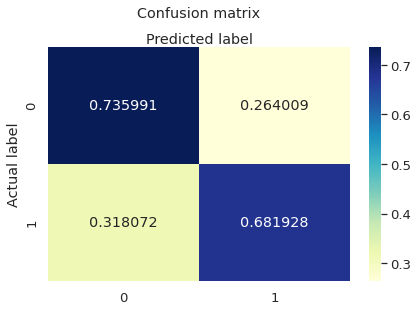

In [38]:
CM=metrics.confusion_matrix(y_test,  heart_Seq_log_pred.round(), normalize='true')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig('SO_Logistic_Confusion_Matrix.png')

In [39]:
print(classification_report(y_test,heart_Seq_log_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     87531
           1       0.01      0.68      0.02       415

    accuracy                           0.74     87946
   macro avg       0.51      0.71      0.44     87946
weighted avg       0.99      0.74      0.84     87946



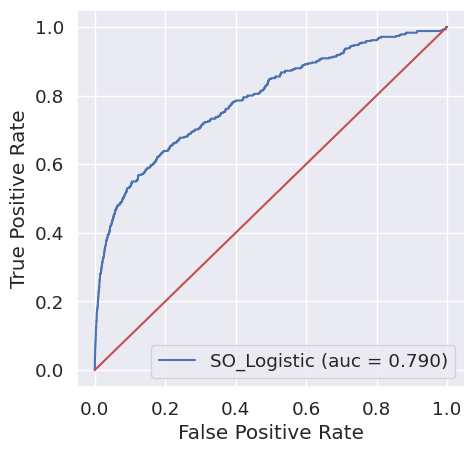

In [40]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,heart_Seq_log_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, label='SO_Logistic (auc = %0.3f)' % auc_logistic)
plt.plot([0,1], [0,1], c='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#plt.savefig('SO_Logistic_AUC.png')

plt.show()

In [41]:
#Compute Precision score 

average_precision = average_precision_score(y_test, heart_Seq_log_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.05


Text(0.5, 1.0, ' Precision-Recall curve: AP=0.05')

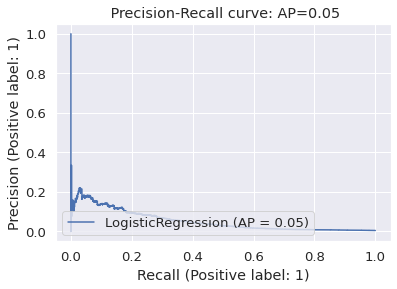

In [42]:
heart_Seq_logg = plot_precision_recall_curve(heart_Seq_log, X_test, y_test)
heart_Seq_logg.ax_.set_title(' Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
#plt.savefig('SO_Logistic_PR_CURVE.png')

#  HEART SEQUENCE PLUS SHAPE LOGISTIC REGRESSION 

In [43]:
Positive_heart_Seq_Sha = pd.read_csv('POSITIVE_HEART_SEQ_SHAP_DATA.csv')
Positive_heart_Seq_Sha['Label'] = 'bound'



Negative_heart_Seq_Sha = pd.read_csv('NEGATIVE_HEART_SEQ_SHAP_DATA.csv')
Negative_heart_Seq_Sha['Label'] = 'unbound'



#Sampled_heart_Neg = resample(Negative_heart_Seq_Sha, n_samples=67014, replace=False, stratify = Negative_heart_Seq_Sha)




heart_Seq_Sha_Data = pd.concat([Positive_heart_Seq_Sha,Negative_heart_Seq_Sha], ignore_index=True)
heart_Seq_Sha_Data = heart_Seq_Sha_Data.reindex(np.random.permutation(heart_Seq_Sha_Data.index))


heart_Seq_Sha_Data['label']=pd.get_dummies(heart_Seq_Sha_Data.Label, prefix='Label').iloc[:,:-1]
heart_Seq_Sha_Data = heart_Seq_Sha_Data.drop(['Label'], axis =1)


heart_Seq_Sha_Data_X = heart_Seq_Sha_Data.drop('label', axis=1)
heart_Seq_Sha_Data_Y = heart_Seq_Sha_Data['label']

# Logistic regression

In [44]:
X_train,X_test,y_train,y_test = train_test_split(heart_Seq_Sha_Data_X,heart_Seq_Sha_Data_Y,test_size=0.3, random_state=4)


In [45]:
heart_Seq_Sha_log = LogisticRegression( max_iter=10000000,class_weight= {0:1,1:223},random_state= 4)
heart_Seq_Sha_log.fit(X_train,y_train)
print(heart_Seq_Sha_log.score(X_train,y_train))

0.9182825147290297


In [46]:
heart_Seq_Sha_log_pred=heart_Seq_Sha_log.predict_proba(X_test)[:,1]

Text(0.5, 257.44, 'Predicted label')

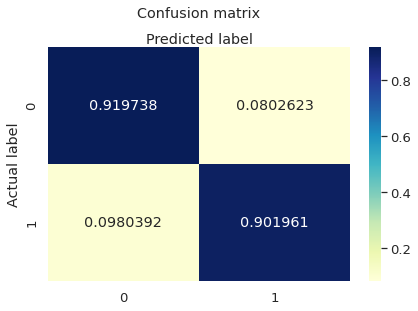

In [47]:
CM=metrics.confusion_matrix(y_test,  heart_Seq_Sha_log_pred.round(), normalize='true')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig('SO_Logistic_Confusion_Matrix.png')

In [48]:
print(classification_report(y_test,heart_Seq_Sha_log_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     87538
           1       0.05      0.90      0.09       408

    accuracy                           0.92     87946
   macro avg       0.52      0.91      0.53     87946
weighted avg       1.00      0.92      0.95     87946



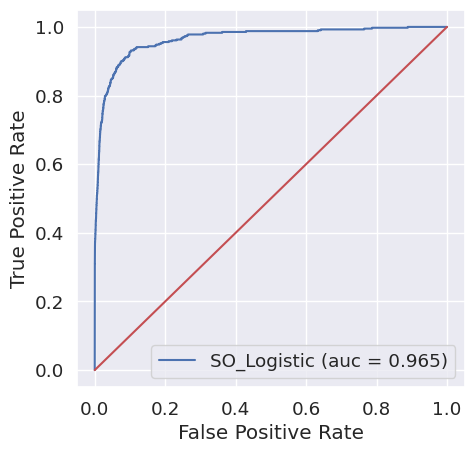

In [49]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,heart_Seq_Sha_log_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, label='SO_Logistic (auc = %0.3f)' % auc_logistic)
plt.plot([0,1], [0,1], c='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#plt.savefig('SO_Logistic_AUC.png')

plt.show()

In [50]:
#Compute Precision score 

average_precision = average_precision_score(y_test, heart_Seq_Sha_log_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.46


Text(0.5, 1.0, ' Precision-Recall curve: AP=0.46')

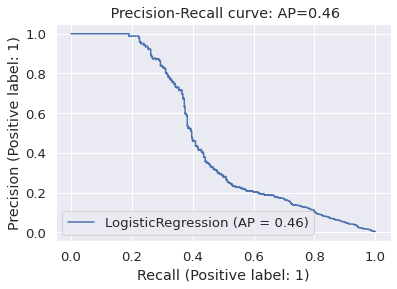

In [51]:
heart_Seq_Sha_logg = plot_precision_recall_curve(heart_Seq_Sha_log, X_test, y_test)
heart_Seq_Sha_logg.ax_.set_title(' Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
#plt.savefig('SO_Logistic_PR_CURVE.png')

# MODEL FOR THE HEART SEQ + SHAPE + HISTONE.

In [52]:
Positive_HEART_SSH = pd.read_csv('POSITIVE_HEART_SEQSHAHIST.csv')
Positive_HEART_SSH['Label'] = 'Bound'





Negative_HEART_SSH = pd.read_csv('NEGATIVE_HEART_SEQSHAHIST.csv')
Negative_HEART_SSH['Label'] = 'Unbound'



#Sampled_HEART_Neg = resample(Negative_HEART_SSH, n_samples=67014, replace=False, stratify = Negative_HEART_SSH)
#Sampled_HEART_Neg

HEART_three_Data = pd.concat([Positive_HEART_SSH,Negative_HEART_SSH], ignore_index=True)
HEART_three_Data = HEART_three_Data.reindex(np.random.permutation(HEART_three_Data.index))




HEART_three_Data['label']=pd.get_dummies(HEART_three_Data.Label, prefix='Label').iloc[:,:-1]
HEART_three_Data = HEART_three_Data.drop(['Label'], axis =1)


HEART_three_Data_X = HEART_three_Data.drop('label', axis=1)
HEART_three_Data_Y = HEART_three_Data['label']

# HEART MODEL FOR LOGISTIC REGRESSION SEQUENCE_SHAPE_HISTONE

In [53]:
X_train,X_test,y_train,y_test = train_test_split(HEART_three_Data_X,HEART_three_Data_Y,test_size=0.3, random_state= 4)

In [54]:
heart_model_log = LogisticRegression(solver='lbfgs', max_iter=10000000, class_weight= {0:1,1:223},random_state= 4)
heart_model_log.fit(X_train,y_train)
print(heart_model_log.score(X_train,y_train))

0.94474360036451


In [55]:
heart_model_log_pred = heart_model_log.predict_proba(X_test)[:,1]

Text(0.5, 257.44, 'Predicted label')

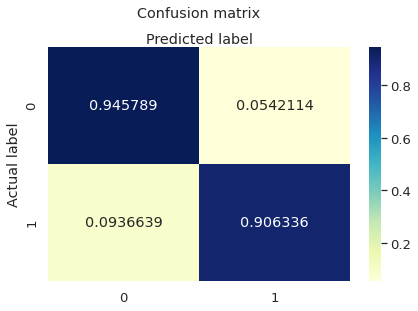

In [56]:
CM=metrics.confusion_matrix(y_test,  heart_model_log_pred.round(), normalize='true')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig('ALL_Logistic_Confusion_Matrix.png')

In [57]:
print(classification_report(y_test, heart_model_log_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     87583
           1       0.06      0.91      0.12       363

    accuracy                           0.95     87946
   macro avg       0.53      0.93      0.55     87946
weighted avg       1.00      0.95      0.97     87946



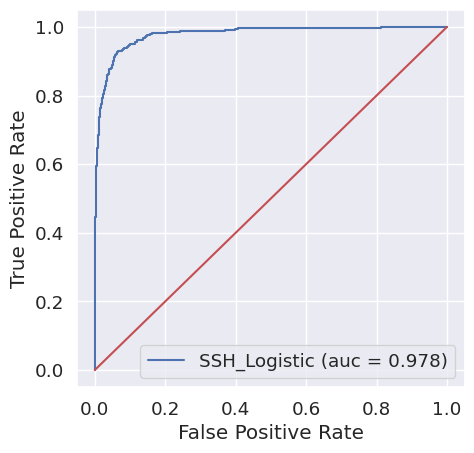

In [58]:
heart_log_fpr, heart_log_tpr, threshold = roc_curve(y_test, heart_model_log_pred)
heart_log_auc_logistic = auc(heart_log_fpr, heart_log_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(heart_log_fpr, heart_log_tpr, label='SSH_Logistic (auc = %0.3f)' % heart_log_auc_logistic)
plt.plot([0,1], [0,1], c='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#plt.savefig('ALL_LOG_AUC_CURVE.png')

plt.show()

In [59]:
heart_log_average_precision = average_precision_score(y_test,  heart_model_log_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      heart_log_average_precision))

Average precision-recall score: 0.43


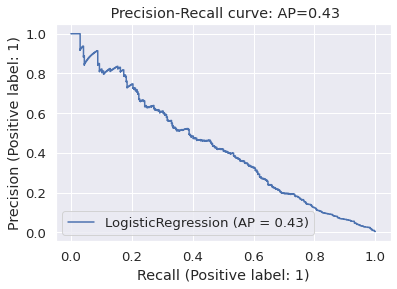

In [60]:
heart_log_Seq = plot_precision_recall_curve( heart_model_log, X_test, y_test)
heart_log_Seq.ax_.set_title(' Precision-Recall curve: '
                   'AP={0:0.2f}'.format(heart_log_average_precision))
#plt.savefig('ALL_LOG_PR_CURVE.png')
plt.show()

# HEART CROSS VALIDATION FOR ALL MODEL

In [61]:
def make_model(X, y, params):
    from xgboost import XGBClassifier
    
    model = LogisticRegression(
        **params
    )
    model.fit(X, y)

    
    return model

In [62]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve, roc_curve, precision_recall_curve
from sklearn.model_selection import StratifiedKFold

def plot_roc(HEART_three_Data, ax, ax2, params, color, features):
    cv = StratifiedKFold(n_splits=5)

    tprs = []
    recalls = []
    aucs = []
    auc_prcs = []
    mean_fpr = np.linspace(0, 1, 100)
    mean_recalls = np.linspace(0,1,10001)
    X, y = HEART_three_Data.drop('label', axis=1).values, HEART_three_Data['label'].values

    for i, (train, test) in enumerate(cv.split(X, y)):
        print('----', i)
        m = make_model(X[train], y[train],  params)
        #viz = plot_roc_curve(m, X[test], y[test],
        #                     name='ROC fold {}'.format(i),
        #                     alpha=0.3, lw=1, ax=ax)
        y_pred = m.predict_proba(X[test])[:,1]
        viz = roc_curve(y[test], y_pred)
        viz2 = precision_recall_curve(y[test], y_pred)
        interp_tpr = np.interp(mean_fpr, viz[0], viz[1])
        interp_tpr[0] = 0.0
        
        #import pdb; pdb.set_trace()
        interp_recall = np.interp(mean_recalls, viz2[0], viz2[1])
        interp_recall[0] = 1.0
        
        recalls.append(interp_recall)
        tprs.append(interp_tpr)
        auc_prcs.append(auc(viz2[1], viz2[0]))
        aucs.append(auc(viz[0], viz[1]))
        print('AUROCS: ', aucs)
        print('AUPRCS: ', auc_prcs)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            alpha=.8)

    mean_recall = np.mean(recalls, axis=0)
    mean_recall[-1] = 0.0
    mean_auprc = auc(mean_recalls, mean_recall)
    std_auprc = np.std(auc_prcs)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color=color,
            label=r'%s (AUROC = %0.2f $\pm$ %0.2f)' % (features, mean_auc, std_auc),
            lw=2, alpha=.8)

    ax2.plot(mean_recalls, mean_recall, color=color,
        label=r'%s (AUPRC = %0.2f $\pm$ %0.2f)' % (features, mean_auprc, std_auprc),
        lw=2, alpha=.8)

    
    std_tpr = 1.96*np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color=color, alpha=.2)
                    #label=r'$\pm$ 1 std. dev.')

    std_recall = 1.96*np.std(recalls, axis=0)
    recalls_upper = np.minimum(mean_recall + std_recall, 1)
    recalls_lower = np.maximum(mean_recall - std_recall, 0)
    ax2.fill_between(mean_recalls, recalls_lower, recalls_upper, color=color, alpha=.2)
                    #label=r'$\pm$ 1 std. dev.')

        
    #ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    #       title="Receiver operating characteristic example")
    #ax.legend(loc="lower right")
    #plt.show()

sequence
---- 0
AUROCS:  [0.793447129475602]
AUPRCS:  [0.05942741281067149]
---- 1
AUROCS:  [0.793447129475602, 0.7785495190343372]
AUPRCS:  [0.05942741281067149, 0.03479476200915535]
---- 2
AUROCS:  [0.793447129475602, 0.7785495190343372, 0.7991269696713862]
AUPRCS:  [0.05942741281067149, 0.03479476200915535, 0.06057608128780632]
---- 3
AUROCS:  [0.793447129475602, 0.7785495190343372, 0.7991269696713862, 0.7680413938516975]
AUPRCS:  [0.05942741281067149, 0.03479476200915535, 0.06057608128780632, 0.042622142137379776]
---- 4
AUROCS:  [0.793447129475602, 0.7785495190343372, 0.7991269696713862, 0.7680413938516975, 0.7697326897201855]
AUPRCS:  [0.05942741281067149, 0.03479476200915535, 0.06057608128780632, 0.042622142137379776, 0.04484737556572325]
sequence+shape
---- 0
AUROCS:  [0.9732264488901674]
AUPRCS:  [0.46204784413901046]
---- 1
AUROCS:  [0.9732264488901674, 0.9619752971574611]
AUPRCS:  [0.46204784413901046, 0.46720971709121584]
---- 2
AUROCS:  [0.9732264488901674, 0.9619752971574

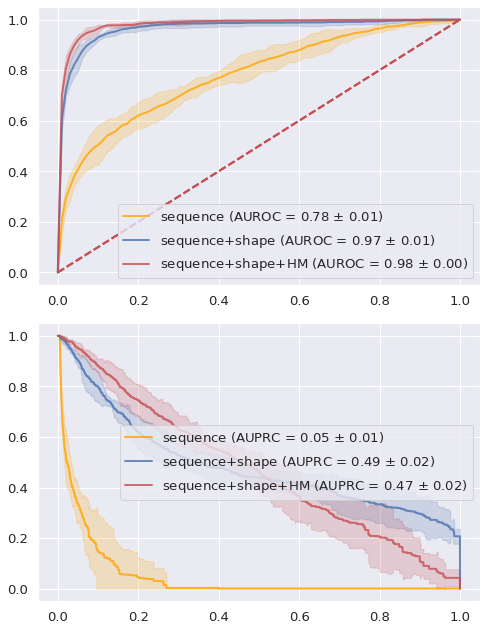

In [63]:
sns.set(font_scale=1.2)
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))
fig.set_size_inches(7, 9)
print('sequence')
# results for best CV

params =  {"max_iter":10000000, "class_weight": {0:1,1:223},"random_state":4}
plot_roc(heart_Seq_Data, ax1, ax2, params, 'orange', 'sequence')

print('sequence+shape')
# results for best CV

params =  {"max_iter":10000000, "class_weight": {0:1,1:223},"random_state":4}
plot_roc(heart_Seq_Sha_Data, ax1, ax2,  params, 'b', 'sequence+shape')

print('sequence+shape+histone')
# results for best CV

params =  { "max_iter":10000000, "class_weight": {0:1,1:223},"random_state":4 }
plot_roc(HEART_three_Data, ax1, ax2,  params, 'r', 'sequence+shape+HM')



ax1.legend(loc='lower right')
ax2.legend(loc='center right')
plt.tight_layout()
plt.savefig('HEART_LOGISTIC_SUPP_PERFORMANCE_METRICS.png')
plt.show()

# SEQUENCE ONLY MODEL FOR KIDNEY

In [64]:




Kid_Pos_Seq= pd.read_csv('Positive_Kidney_One_hot.csv', header = None)
Kid_Pos_Seq['Label'] = 'bound'


Kid_Neg_Seq = pd.read_csv('Negative_Kidney_One_hot.csv', header = None)
Kid_Neg_Seq['Label'] = 'unbound'


#Neg_Kid_Seq_Sample = resample(Kid_Neg_Seq, n_samples=3237, replace=False, stratify=Kid_Neg_Seq)

Kid_Seq_Data = pd.concat([Kid_Pos_Seq,Kid_Neg_Seq],ignore_index=True)
Kid_Seq_Data = Kid_Seq_Data.reindex(np.random.permutation(Kid_Seq_Data.index))

Kid_Seq_Data['label']=pd.get_dummies(Kid_Seq_Data.Label, prefix='Label').iloc[:,:-1]
Kid_Seq_Data = Kid_Seq_Data.drop(['Label'], axis =1)


Kid_Seq_X = Kid_Seq_Data.drop('label', axis=1)
Kid_Seq_Y = Kid_Seq_Data['label']

# KIDNEY SEQUENCE ONLY LOGISTIC REGRESSION 

In [65]:
X_train,X_test,y_train,y_test = train_test_split(Kid_Seq_X,Kid_Seq_Y,test_size=0.3, random_state=40210404)


In [66]:
Kid_Seq_log = LogisticRegression(solver='lbfgs', max_iter=1000000,class_weight= {0:1,1:81}, random_state= 40210404)
Kid_Seq_log.fit(X_train,y_train)
print(Kid_Seq_log.score(X_train,y_train))

0.7120294233264944


In [67]:
Kid_Seq_log_pred=Kid_Seq_log.predict_proba(X_test)[:,1]

Text(0.5, 257.44, 'Predicted label')

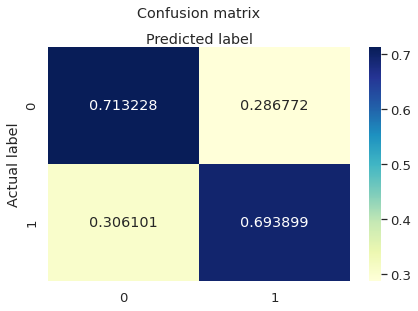

In [68]:
CM=metrics.confusion_matrix(y_test,  Kid_Seq_log_pred.round(), normalize='true')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig('SO_Logistic_Confusion_Matrix.png')

In [69]:
print(classification_report(y_test,Kid_Seq_log_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     78620
           1       0.03      0.69      0.06       967

    accuracy                           0.71     79587
   macro avg       0.51      0.70      0.44     79587
weighted avg       0.98      0.71      0.82     79587



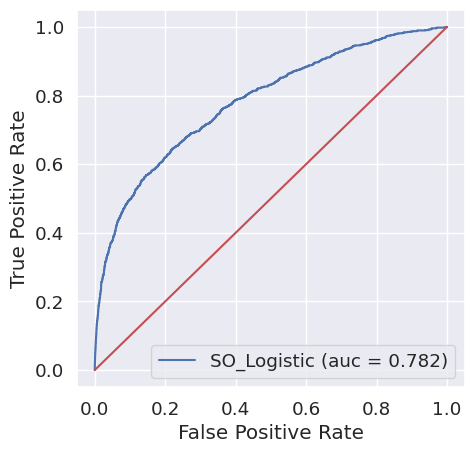

In [70]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,Kid_Seq_log_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, label='SO_Logistic (auc = %0.3f)' % auc_logistic)
plt.plot([0,1], [0,1], c='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#plt.savefig('SO_Logistic_AUC.png')

plt.show()

In [71]:
#Compute Precision score 

average_precision = average_precision_score(y_test, Kid_Seq_log_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.10


Text(0.5, 1.0, ' Precision-Recall curve: AP=0.10')

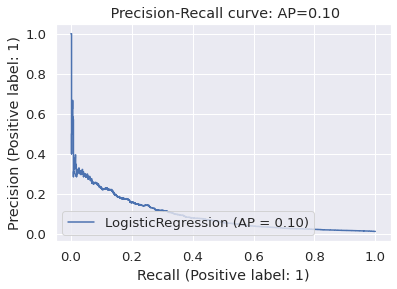

In [72]:
Kid_Seq_logg = plot_precision_recall_curve(Kid_Seq_log, X_test, y_test)
Kid_Seq_logg.ax_.set_title(' Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
#plt.savefig('SO_Logistic_PR_CURVE.png')

# MODEL FOR KIDNEY SEQ  +  SHAPE

In [73]:
Positive_Kidney_Seq_Sha = pd.read_csv('POSITIVE_KIDNEY_SEQSHAPE_DATA.csv')
Positive_Kidney_Seq_Sha['Label'] = 'bound'



Negative_Kidney_Seq_Sha = pd.read_csv('NEGATIVE_KIDNEY_SEQ_SHAPE_DATA.csv')
Negative_Kidney_Seq_Sha['Label'] = 'unbound'



#Sampled_Kidney_Neg = resample(Negative_Kidney_Seq_Sha, n_samples=161850, replace=False, stratify = Negative_Kidney_Seq_Sha)
#Sampled_Kidney_Neg



Kidney_Seq_Sha_Data = pd.concat([Positive_Kidney_Seq_Sha,Negative_Kidney_Seq_Sha], ignore_index=True)
Kidney_Seq_Sha_Data = Kidney_Seq_Sha_Data.reindex(np.random.permutation(Kidney_Seq_Sha_Data.index))
Kidney_Seq_Sha_Data

Kidney_Seq_Sha_Data['label']=pd.get_dummies(Kidney_Seq_Sha_Data.Label, prefix='Label').iloc[:,:-1]
Kidney_Seq_Sha_Data = Kidney_Seq_Sha_Data.drop(['Label'], axis =1)
Kidney_Seq_Sha_Data

Kidney_Seq_Sha_Data_X = Kidney_Seq_Sha_Data.drop('label', axis=1)
Kidney_Seq_Sha_Data_Y = Kidney_Seq_Sha_Data['label']

# KIDNEY SEQ + SHAPE MODEL FOR LOGISTIC REGRESSION

In [74]:
kid_seq_sha_model_log = LogisticRegression(solver='lbfgs', max_iter=1000000, class_weight= {0:1,1:81},random_state= 40210894)
kid_seq_sha_model_log.fit(X_train,y_train)
print(kid_seq_sha_model_log.score(X_train,y_train))

0.7120294233264944


In [75]:
kid_seq_sha_model_log_pred = kid_seq_sha_model_log.predict_proba(X_test)[:,1]

Text(0.5, 257.44, 'Predicted label')

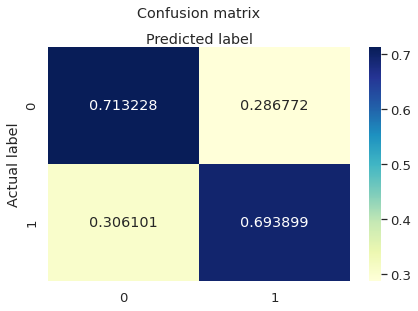

In [76]:
CM=metrics.confusion_matrix(y_test,  kid_seq_sha_model_log_pred.round(), normalize='true')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig('ALL_Logistic_Confusion_Matrix.png')

In [77]:
print(classification_report(y_test, kid_seq_sha_model_log_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     78620
           1       0.03      0.69      0.06       967

    accuracy                           0.71     79587
   macro avg       0.51      0.70      0.44     79587
weighted avg       0.98      0.71      0.82     79587



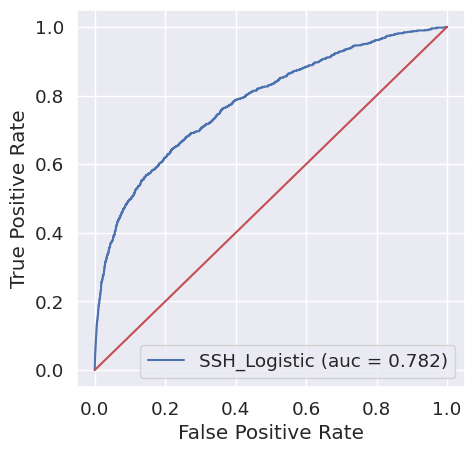

In [78]:
kid_seq_sha_log_fpr, kid_seq_sha_log_tpr, threshold = roc_curve(y_test, kid_seq_sha_model_log_pred)
kid_seq_sha_log_auc_logistic = auc(kid_seq_sha_log_fpr, kid_seq_sha_log_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(kid_seq_sha_log_fpr, kid_seq_sha_log_tpr, label='SSH_Logistic (auc = %0.3f)' % kid_seq_sha_log_auc_logistic)
plt.plot([0,1], [0,1], c='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#plt.savefig('ALL_LOG_AUC_CURVE.png')

plt.show()

In [79]:
kid_seq_sha_log_average_precision = average_precision_score(y_test,  kid_seq_sha_model_log_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      kid_seq_sha_log_average_precision))

Average precision-recall score: 0.10


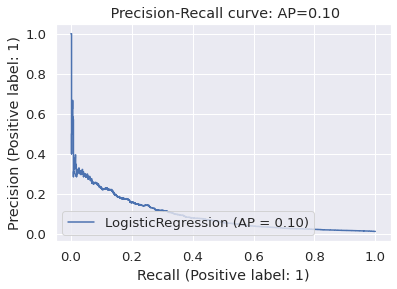

In [80]:
kid_seq_sha_log_Seq = plot_precision_recall_curve( kid_seq_sha_model_log, X_test, y_test)
kid_seq_sha_log_Seq.ax_.set_title(' Precision-Recall curve: '
                   'AP={0:0.2f}'.format(kid_seq_sha_log_average_precision))
#plt.savefig('ALL_LOG_PR_CURVE.png')
plt.show()

# MODEL FOR KIDNEY SEQ + SHAPE + HISTONE

In [81]:
Positive_KIDNEY_SSH = pd.read_csv('POSITIVE_KIDNEY_SEQSHAHIST_DATA.csv')
Positive_KIDNEY_SSH['Label'] = 'Bound'





Negative_KIDNEY_SSH = pd.read_csv('NEGATIVE_KIDNEY_SEQSHAHIST_DATA.csv')
Negative_KIDNEY_SSH = pd.DataFrame(Negative_KIDNEY_SSH).fillna(0)
Negative_KIDNEY_SSH['Label'] = 'Unbound'


#Sampled_Kidney_Neg = resample(Negative_KIDNEY_SSH, n_samples=161850, replace=False, stratify=Negative_KIDNEY_SSH)
#Sampled_Kidney_Neg

KIDNEY_three_Data = pd.concat([Positive_KIDNEY_SSH,Negative_KIDNEY_SSH], ignore_index=True)
KIDNEY_three_Data = KIDNEY_three_Data.reindex(np.random.permutation(KIDNEY_three_Data.index))
KIDNEY_three_Data


KIDNEY_three_Data['label']=pd.get_dummies(KIDNEY_three_Data.Label, prefix='Label').iloc[:,:-1]
KIDNEY_three_Data = KIDNEY_three_Data.drop(['Label'], axis =1)


KIDNEY_three_Data_X = KIDNEY_three_Data.drop('label', axis=1)
KIDNEY_three_Data_Y = KIDNEY_three_Data['label']

# KIDNEY MODEL FOR LOGISTIC REGRESSION SEQUENCE_SHAPE_HISTONE

In [82]:
X_train,X_test,y_train,y_test = train_test_split(KIDNEY_three_Data_X, KIDNEY_three_Data_Y, test_size=0.3, random_state= 40210894)

In [83]:
kidney_model_log = LogisticRegression(solver='lbfgs', max_iter=1000000, class_weight= {0:1,1:81},random_state= 40210894)
kidney_model_log.fit(X_train,y_train)
print(kidney_model_log.score(X_train,y_train))

0.823820832189033


In [84]:
kidney_model_log_pred = kidney_model_log.predict_proba(X_test)[:,1]

Text(0.5, 257.44, 'Predicted label')

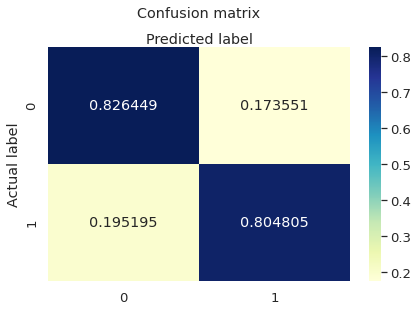

In [85]:
CM=metrics.confusion_matrix(y_test,  kidney_model_log_pred.round(), normalize='true')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig('ALL_Logistic_Confusion_Matrix.png')

In [86]:
print(classification_report(y_test, kidney_model_log_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90     78588
           1       0.06      0.80      0.10       999

    accuracy                           0.83     79587
   macro avg       0.53      0.82      0.50     79587
weighted avg       0.99      0.83      0.89     79587



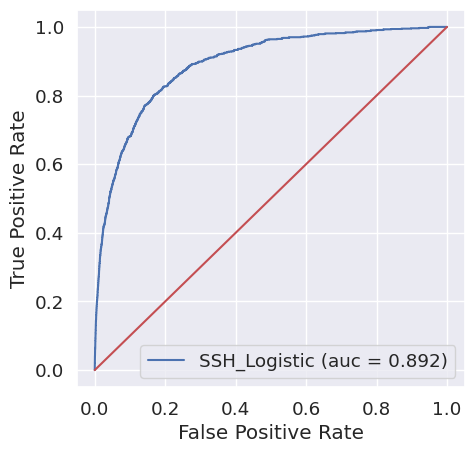

In [87]:
kid_log_fpr, kid_log_tpr, threshold = roc_curve(y_test, kidney_model_log_pred)
kid_log_auc_logistic = auc(kid_log_fpr, kid_log_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(kid_log_fpr, kid_log_tpr, label='SSH_Logistic (auc = %0.3f)' % kid_log_auc_logistic)
plt.plot([0,1], [0,1], c='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

#plt.savefig('ALL_LOG_AUC_CURVE.png')

plt.show()

In [88]:
kid_log_average_precision = average_precision_score(y_test,  kidney_model_log_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      kid_log_average_precision))

Average precision-recall score: 0.17


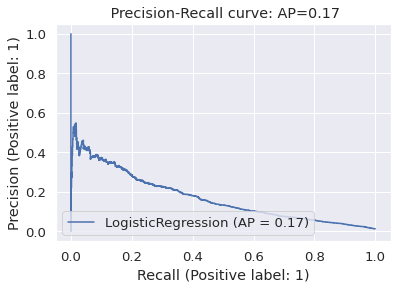

In [89]:
kid_log_Seq = plot_precision_recall_curve( kidney_model_log, X_test, y_test)
kid_log_Seq.ax_.set_title(' Precision-Recall curve: '
                   'AP={0:0.2f}'.format(kid_log_average_precision))
#plt.savefig('ALL_LOG_PR_CURVE.png')
plt.show()

# KIDNEY CROSS VALIDATION FOR ALL MODEL

In [90]:
def make_model(X, y, params):
    from xgboost import XGBClassifier
    
    model = LogisticRegression(
        **params
    )
    model.fit(X, y)

    
    return model

In [91]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve, roc_curve, precision_recall_curve
from sklearn.model_selection import StratifiedKFold

def plot_roc(KIDNEY_three_Data, ax, ax2, params, color, features):
    cv = StratifiedKFold(n_splits=5)

    tprs = []
    recalls = []
    aucs = []
    auc_prcs = []
    mean_fpr = np.linspace(0, 1, 100)
    mean_recalls = np.linspace(0,1,10001)
    X, y = KIDNEY_three_Data.drop('label', axis=1).values, KIDNEY_three_Data['label'].values

    for i, (train, test) in enumerate(cv.split(X, y)):
        print('----', i)
        m = make_model(X[train], y[train],  params)
        #viz = plot_roc_curve(m, X[test], y[test],
        #                     name='ROC fold {}'.format(i),
        #                     alpha=0.3, lw=1, ax=ax)
        y_pred = m.predict_proba(X[test])[:,1]
        viz = roc_curve(y[test], y_pred)
        viz2 = precision_recall_curve(y[test], y_pred)
        interp_tpr = np.interp(mean_fpr, viz[0], viz[1])
        interp_tpr[0] = 0.0
        
        #import pdb; pdb.set_trace()
        interp_recall = np.interp(mean_recalls, viz2[0], viz2[1])
        interp_recall[0] = 1.0
        
        recalls.append(interp_recall)
        tprs.append(interp_tpr)
        auc_prcs.append(auc(viz2[1], viz2[0]))
        aucs.append(auc(viz[0], viz[1]))
        print('AUROCS: ', aucs)
        print('AUPRCS: ', auc_prcs)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            alpha=.8)

    mean_recall = np.mean(recalls, axis=0)
    mean_recall[-1] = 0.0
    mean_auprc = auc(mean_recalls, mean_recall)
    std_auprc = np.std(auc_prcs)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color=color,
            label=r'%s (AUROC = %0.2f $\pm$ %0.2f)' % (features, mean_auc, std_auc),
            lw=2, alpha=.8)

    ax2.plot(mean_recalls, mean_recall, color=color,
        label=r'%s (AUPRC = %0.2f $\pm$ %0.2f)' % (features, mean_auprc, std_auprc),
        lw=2, alpha=.8)

    
    std_tpr = 1.96*np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color=color, alpha=.2)
                    #label=r'$\pm$ 1 std. dev.')

    std_recall = 1.96*np.std(recalls, axis=0)
    recalls_upper = np.minimum(mean_recall + std_recall, 1)
    recalls_lower = np.maximum(mean_recall - std_recall, 0)
    ax2.fill_between(mean_recalls, recalls_lower, recalls_upper, color=color, alpha=.2)
                    #label=r'$\pm$ 1 std. dev.')

        
    #ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    #       title="Receiver operating characteristic example")
    #ax.legend(loc="lower right")
    #plt.show()

sequence
---- 0
AUROCS:  [0.7736308673359478]
AUPRCS:  [0.09764262823475901]
---- 1
AUROCS:  [0.7736308673359478, 0.780967437932685]
AUPRCS:  [0.09764262823475901, 0.10177874023585075]
---- 2
AUROCS:  [0.7736308673359478, 0.780967437932685, 0.7683659031073418]
AUPRCS:  [0.09764262823475901, 0.10177874023585075, 0.08502740941409843]
---- 3
AUROCS:  [0.7736308673359478, 0.780967437932685, 0.7683659031073418, 0.7621962753314913]
AUPRCS:  [0.09764262823475901, 0.10177874023585075, 0.08502740941409843, 0.10421214309462565]
---- 4
AUROCS:  [0.7736308673359478, 0.780967437932685, 0.7683659031073418, 0.7621962753314913, 0.773319679709602]
AUPRCS:  [0.09764262823475901, 0.10177874023585075, 0.08502740941409843, 0.10421214309462565, 0.08642072287382338]
sequence+shape
---- 0
AUROCS:  [0.7841847563354403]
AUPRCS:  [0.08488353464037021]
---- 1
AUROCS:  [0.7841847563354403, 0.7995347791620958]
AUPRCS:  [0.08488353464037021, 0.10535405735342006]
---- 2
AUROCS:  [0.7841847563354403, 0.799534779162095

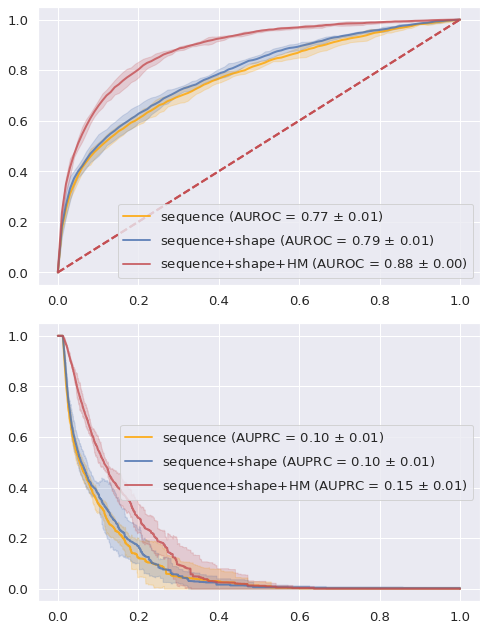

In [92]:
sns.set(font_scale=1.2)
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))
fig.set_size_inches(7, 9)
print('sequence')
# results for best CV

params =  {"max_iter":10000000, "class_weight": {0:1,1:223},"random_state":4}
plot_roc(Kid_Seq_Data, ax1, ax2, params, 'orange', 'sequence')

print('sequence+shape')
# results for best CV

params =  {"max_iter":10000000, "class_weight": {0:1,1:223},"random_state":4}
plot_roc(Kidney_Seq_Sha_Data, ax1, ax2,  params, 'b', 'sequence+shape')

print('sequence+shape+histone')
# results for best CV

params =  { "max_iter":10000000, "class_weight": {0:1,1:223},"random_state":4 }
plot_roc(KIDNEY_three_Data, ax1, ax2,  params, 'r', 'sequence+shape+HM')



ax1.legend(loc='lower right')
ax2.legend(loc='center right')
plt.tight_layout()
plt.savefig('KIDNEY_LOGISTIC_SUPP_PERFORMANCE_METRICS.png')
plt.show()